Oct 23 - 28

1. T_N vs M_h (use M_GC = 1e5 M_sun);

2. L_cen vs M_h; richness vs Mh;

3. EMOSAICS RC lines in Fig1;

4. data from Harris 17, Hudson 14 (Fig.1 lines);

5. MCMC a 1-power law model -> see;

6. Change Creasey model on merger tree -> see how it goes;

7. Choski & Gnedin fig.1, follow their model -> merger tree M1/M2 ratio model;

8. three mechanism: Naoz & Narayan, Zaritsky, EMOSAICS(GC in situ and accrete); GC evaporate;

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from astropy.table import Table

In [4]:
from tqdm import tqdm

In [5]:
import astropy.io.fits as fits

In [6]:
from IPython.display import display, Math

get data from MCMC

In [7]:
#load total GCs in groups
data4   = fits.getdata('/data/lemn/results/Mh_NGCs_avg100samples.fits')
M_group = data4['M halo']
tot_GC  = data4['tot NGCs']
err_GC  = data4['1-sigma']

calculate the mean value of #GCs in each mass bin

In [8]:
#sort mass and other arrays in order of increasing mass, to divide into bins
arg_sort = np.argsort(M_group)

In [9]:
M_sort = M_group[arg_sort]
N_sort = tot_GC[arg_sort]
err_sort = err_GC[arg_sort]

In [10]:
#create the mass bin array
nbin = 101
M_bin = np.logspace(np.log10(M_sort[0]), np.log10(M_sort[len(M_sort)-1]),nbin)

In [11]:
N_mean = np.zeros(nbin-1)
M_mean = np.zeros(nbin-1)
std_mean = np.zeros(nbin-1)

In [12]:
j = 0
stop = -1
for i in range(0,len(M_sort)):
    start = stop + 1
    if M_sort[i] > M_bin[j]:   #take sum of all the points within mass bin, if point larger, move to next bins
        stop = i-1       
        N_mean[j] = np.mean(N_sort[start:stop])
        M_mean[j] = np.mean(M_sort[start:stop])
        std_mean[j] = np.std(N_sort[start:stop])
        j += 1
        #print(stop)
        
#last bin, for the remain points
start = stop + 1
stop = len(M_sort)
std_mean[j] = np.std(N_sort[start:stop])
N_mean[j] = np.mean(N_sort[start:stop])
M_mean[j] = np.mean(M_sort[start:stop])

/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

In [13]:
i_plot = np.random.rand(10,1000)
i_plot *= len(M_group)
i_plot = i_plot.reshape(10000)
i_plot = i_plot.astype(int)

In [14]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [15]:
#load Zaritsky data [log10(M_h), log10(N_GC), err_GC]
N_Z = np.loadtxt('/data/lemn/datalit/Zaritsky_data.txt',usecols=(1))
M_Z = np.loadtxt('/data/lemn/datalit/Zaritsky_data.txt',usecols=(0))
err_Z = np.loadtxt('/data/lemn/datalit/Zaritsky_data.txt',usecols=(2))

In [16]:
# load EMOSAICS RC22 Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

In [17]:
#load EMOSAICS 25 MW-like gals, Kruijssen 19 data
M_K19 = np.loadtxt('/data/lemn/datalit/Kruijssen19_EMOSAICS_data.txt', usecols =(0))
N_K19 = np.loadtxt('/data/lemn/datalit/Kruijssen19_EMOSAICS_data.txt', usecols =(1))

In [18]:
#load Forbes 18 data
M_halo_F = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [19]:
#load blue GCs from Creasey data
M_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(0))
N_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(1))

In [20]:
Atlas_H = fits.getdata('/data/lemn/results/M_h_NGCs_Harris-Atlas.fits')

In [21]:
check     = Atlas_H['check T F central']
sum_NGC   = Atlas_H['NGCs']
M_h_array = Atlas_H['M_h M_sun']

In [22]:
check2 = np.argwhere(check==1)

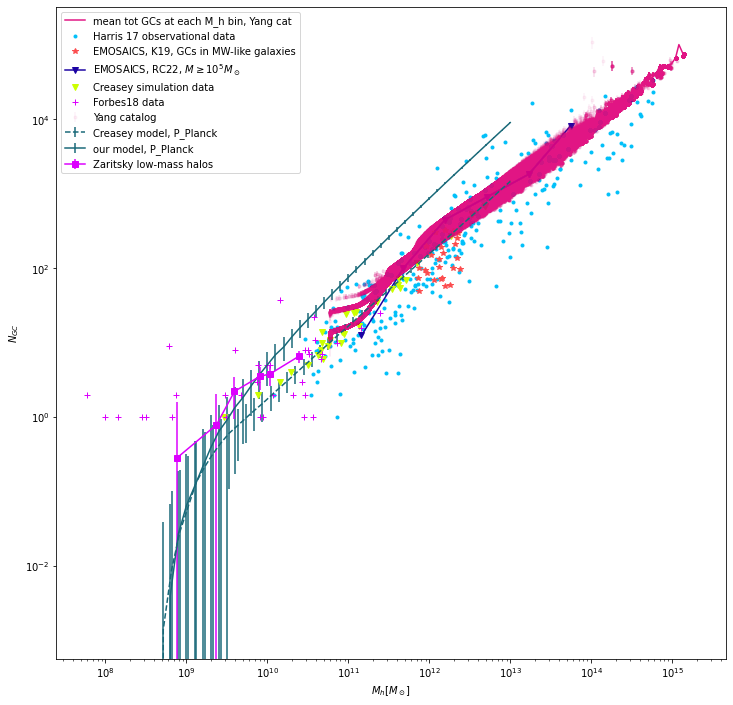

In [37]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')

plt.plot(M_mean, N_mean, color = '#e11584' ,label='mean tot GCs at each M_h bin, Yang cat')
plt.plot(10**M_H17, 10**(eta_H17)*10**M_H17,'.', color ='#00c0f9', label='Harris 17 observational data')
plt.errorbar(M_group[group_01], tot_GC[group_01], yerr =err_GC[group_01], color = '#e11584' ,fmt ='.',alpha = 0.05,label='Yang catalog' )

#plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO WDM')
#plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO WDM')

plt.errorbar(10**M_Z, 10**N_Z, yerr=10**err_Z, color='#dc00fe', fmt='s-', label ='Zaritsky low-mass halos')

plt.plot(10**M_K19, N_K19, '*', color = '#fc4c4e' ,label='EMOSAICS, K19, GCs in MW-like galaxies')
plt.plot(mass_E, triangle, 'v-', color='#1b02a3', label = 'EMOSAICS, RC22, $M \geq 10^5 M_\odot$')
#plt.plot(mass_E, square,   's-', color='#006af9', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
#plt.plot(mass_E, star,     '*-', color='#00c0f9', label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

plt.plot(M_Creasey, N_Creasey,'v', color= '#CCFF00',  label ='Creasey simulation data')
plt.plot(M_halo_F, N_GC_F, '+', color = '#dc00fe',    label ='Forbes18 data')

#plt.plot(M_h_array[check2],sum_NGC[check2], 'o', color ='#fc4c4e' , label = '#GCs in halos, true cen, Harris+Rvir data')
#plt.xlim(5e10,5e11)
plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()
#plt.savefig('tot_GC_err_ver3.pdf')
plt.show()

In [127]:
#load my Harris-Atlas data
ha = fits.getdata('/data/lemn/results/Harris-Atlas_singlegal.fits')
M_HA = ha['M_h M_sun']
N_HA = ha['NGCs']

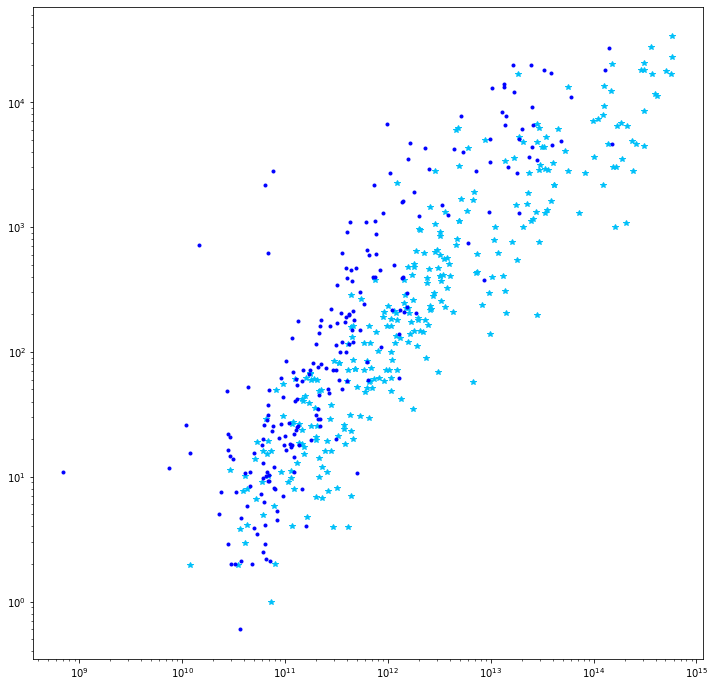

In [129]:
#simple check my Harris-Atlas for single gal with this Harris 17 data
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')
plt.plot(10**M_H17, 10**(eta_H17)*10**M_H17,'*', color ='#00c0f9', label='Harris 17 observational data')
plt.plot(M_HA, N_HA, '.', color='b', label='Harris-Atlas matching')

In [130]:
print(len(N_HA), len(eta_H17))

220 297


better use the results from Harris 17, now let check if it is for single gal-halo or group

plot $\eta_N = N_{GC}/M_h$ vs Mh, compare to Harris 17 data

- Kruijssen 20 also used Harris 17 data to confirm to their simulation EMOSAICS (they asked Harris for the data), and seems they have more data point (Fig 6) than Harris (Fig 2), so I use their plot + plot digitizer to take data (temporaly)

In [24]:
#load data from Harris 17 observational data
M_H17 = np.loadtxt('/data/lemn/datalit/Harris17_data.txt',usecols=(0)) 
eta_H17 = np.loadtxt('/data/lemn/datalit/Harris17_data.txt',usecols=(1)) 

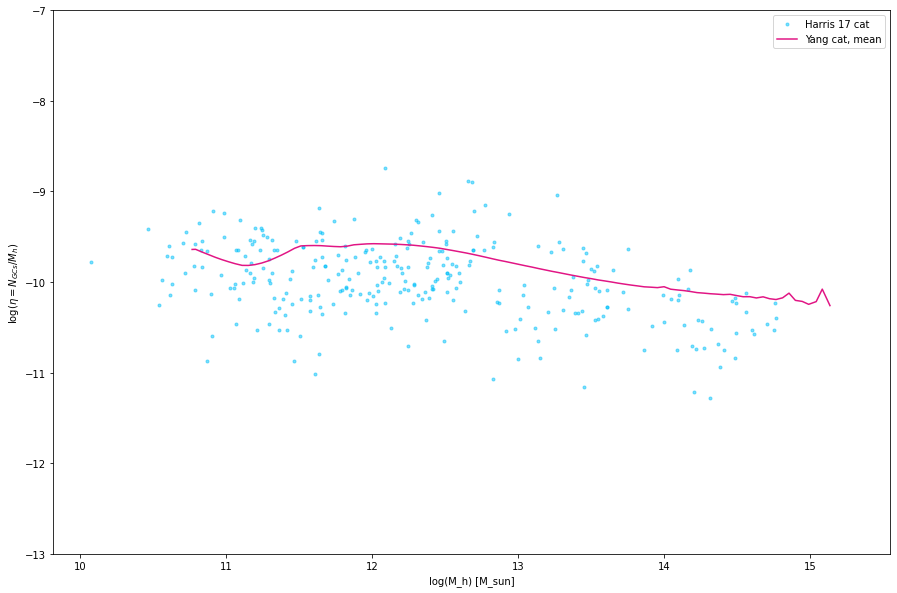

In [124]:
plt.figure(figsize=(15,10))
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('log(M_h) [M_sun]')
plt.ylabel('log($\eta = N_{GCs}/M_h$)')
plt.plot(M_H17, eta_H17, '.', color ='#00c0f9', alpha = 0.5, label = 'Harris 17 cat')
plt.plot(np.log10(M_mean), np.log10(N_mean/M_mean), '-', color ='#e11584', label='Yang cat, mean')
#plt.plot(np.log10(M_group[i_plot]), np.log10(tot_GC[i_plot]/M_group[i_plot]), '.', color = '#e11584',alpha = 0.1,label='Yang cat' )
#plt.plot(np.log10(M_group), np.log10(tot_GC/M_group), '.', color = '#e11584',alpha = 0.1,label='Yang cat' )
plt.ylim(-13,-7)
plt.legend()
plt.show()

1. Specific frequency T_N vs Mh;

In [69]:
M_GC_avg = 1e5 #[Msun]
M_GCS    = tot_GC*M_GC_avg 

In [70]:
#load data from Choski & Gnedin
M_GCS_Ch = np.loadtxt('/data/lemn/datalit/ChoskiGnedin_data.txt',usecols=(1)) 
M_group_Ch = np.loadtxt('/data/lemn/datalit/ChoskiGnedin_data.txt',usecols=(0)) 

- Does it imply that M_GC avg are different for different M_h?

In [139]:
#Hudson 14, Fig 1 lines
M_H14               =  [3262222009.7116733, 21102034285685.88, 2880444153396298]
M_GC_H14            =  [124879.52210263605, 817110331.5457087, 17604108438.65524]
M_H14_corection     =  [3262222009.7116733, 21102034285685.88, 660419396233030.5]
M_GC_H14_correction =  [124879.52210263605, 817110331.5457087, 30370793600.691696]

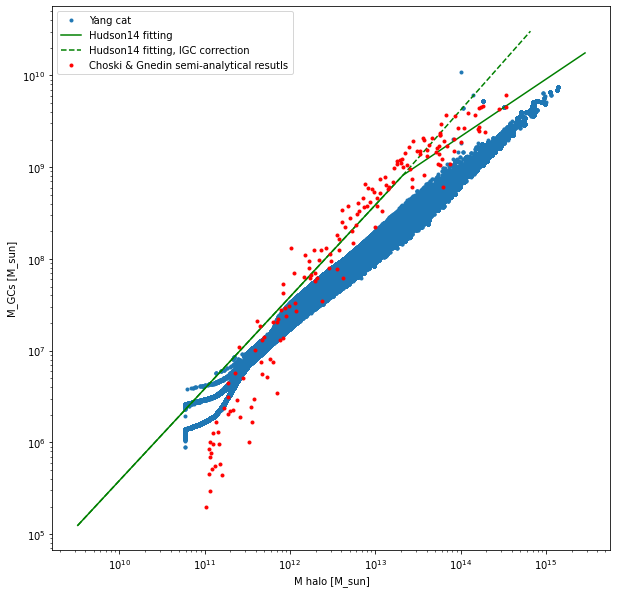

In [179]:
#compare to Choski and Gnedin paper, FIg1.
plt.figure(figsize=(10,10))
plt.plot(M_group[group_01], M_GCS[group_01],'.', label='Yang cat')
plt.plot(M_H14, M_GC_H14,'g-', label='Hudson14 fitting ')
plt.plot(M_H14_corection, M_GC_H14_correction,'g--', label='Hudson14 fitting, IGC correction')
plt.plot(M_group_Ch, M_GCS_Ch,'r.', label='Choski & Gnedin semi-analytical resutls')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M halo [M_sun]')
plt.ylabel('M_GCs [M_sun]')
plt.legend()
plt.show()

2. central Luminosity vs Mh; richness vs Mh

In [27]:
path='/data/lemn/DESIdata/'

In [28]:
#load data 
data5 = fits.getdata(path+'galaxies/DESIDR9_NGC_galaxy.fits')

In [29]:
z = data5['z']

(array([ 1176665.,  5512261.,  9145646., 11474807., 12708323.,  9712862.,
         7297472.,  4889711.,  3526077.,  1753776.]),
 array([6.20000e-04, 1.00558e-01, 2.00496e-01, 3.00434e-01, 4.00372e-01,
        5.00310e-01, 6.00248e-01, 7.00186e-01, 8.00124e-01, 9.00062e-01,
        1.00000e+00]),
 <BarContainer object of 10 artists>)

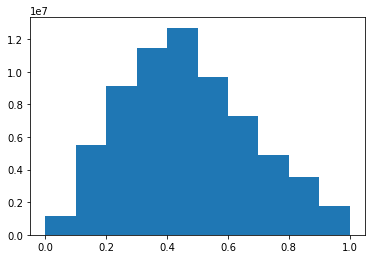

In [143]:
plt.hist(z)

In [30]:
arg_01 = np.argwhere(z <0.1)

In [31]:
arg_01 = arg_01.reshape(len(arg_01))

In [35]:
print(igroup_ID[arg_01])

[ 1319525. 19900971.  1319525. ... 35648500. 35648582. 35648553.]


In [36]:
group_01 = igroup_ID[arg_01].astype(int)

(array([  1858.,  10738.,  40000.,  59413.,  79858., 105068., 136800.,
        184646., 244991., 293525.]),
 array([0.00062 , 0.010557, 0.020494, 0.030431, 0.040368, 0.050305,
        0.060242, 0.070179, 0.080116, 0.090053, 0.09999 ]),
 <BarContainer object of 10 artists>)

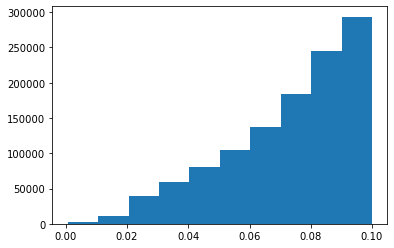

In [147]:
plt.hist(z[arg_01])

In [38]:
M_z = data5['M_zband']

In [39]:
L = data5['L']

In [33]:
#load infor of members in group
mem = fits.getdata(path+'members/iDESIDR9_NGC_1.fits')

In [40]:
cen_check = np.loadtxt(path+'members/iDESIDR9_NGC_1', usecols=(2))

In [41]:
cen_no = np.argwhere(cen_check==1) #take arg of central galaxies
#print(cen_no)

In [42]:
cen_no = cen_no.reshape(len(cen_no))

In [43]:
print(cen_no)

[       0        1        3 ... 67197596 67197597 67197599]


In [44]:
L_cen = L[cen_no]

In [45]:
igroup_ID = mem['groupID']

In [46]:
print(igroup_ID)

[51440885. 44818262.  6813804. ... 35648545.  1263630. 10359362.]


In [48]:
cen_id = igroup_ID[cen_no]

In [49]:
cen_id = cen_id.astype(int)

In [50]:
print(max(cen_id))

51440885


In [51]:
M_h_cen = M_group[cen_id-1]

In [52]:
#load infor of members in group
group = fits.getdata(path+'groups/DESIDR9_NGC_group.fits')

In [53]:
richness = group['richness']

plot richness vs Mh

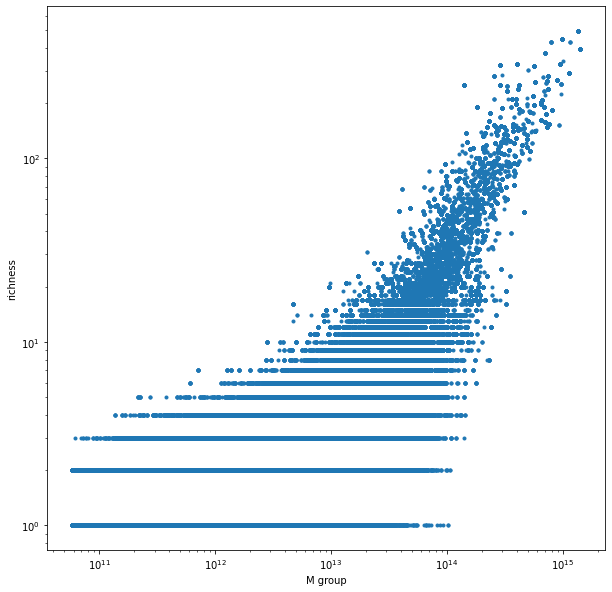

In [54]:
plt.figure(figsize=(10,10))
plt.loglog(M_group[group_01],richness[group_01],'.')
plt.ylabel('richness')
plt.xlabel('M group')
plt.show()

In [55]:
from matplotlib import colors

plot richness vs Mh of groups in z<0.03

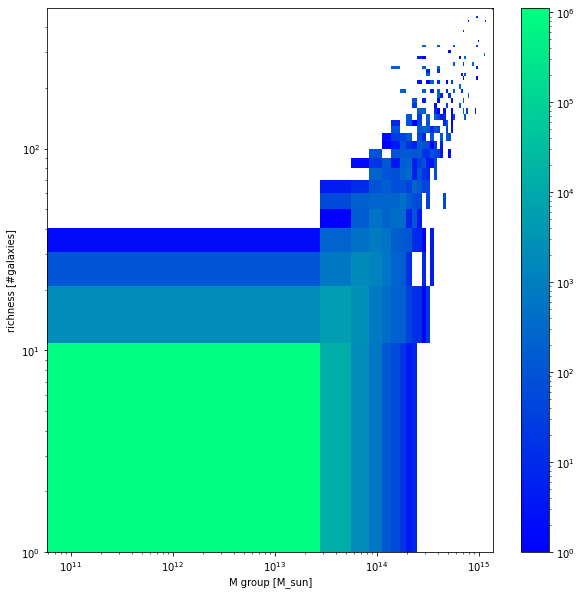

In [66]:
plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.hist2d(M_group[group_01],richness[group_01], bins = [50,50],norm = colors.LogNorm(),cmap='winter')
plt.ylabel('richness [#galaxies]')
plt.xlabel('M group [M_sun]')
plt.colorbar()
plt.show()

In [91]:
richness = richness.astype(int)

In [92]:
sort_id = np.argsort(igroup_ID)

In [93]:
tot_L = np.zeros(len(M_group))

In [94]:
#the remaining terms
start = 0
for i in range(0,len(M_group)):
    stop = start + richness[i]
    for j in range(start,stop):
        tot_L[i] += L[sort_id[j]]
    start = stop

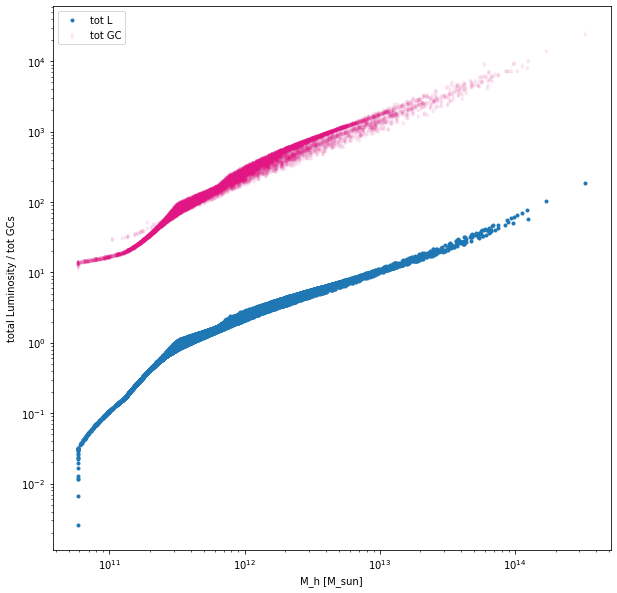

In [95]:
plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M_h [M_sun]')
plt.ylabel('total Luminosity / tot GCs')
plt.plot(M_group[i_plot], tot_L[i_plot],'.', label='tot L')
plt.errorbar(M_group[i_plot], tot_GC[i_plot], yerr =err_GC[i_plot], color = '#e11584' ,fmt ='.',alpha = 0.05,label='tot GC' )
plt.legend()
plt.show()

- the shallower trend at low mass end for totGC is because of the MCMC model which is nearly const at the dimmer galaxy (higher abd Mz-band)

In [97]:
b = np.argsort(M_group)

In [98]:
M_group = M_group[b]
tot_L   = tot_L[b]

In [99]:
a = np.argsort(M_h_cen)
M_h_cen = M_h_cen[a]
L_cen   = L_cen[a]

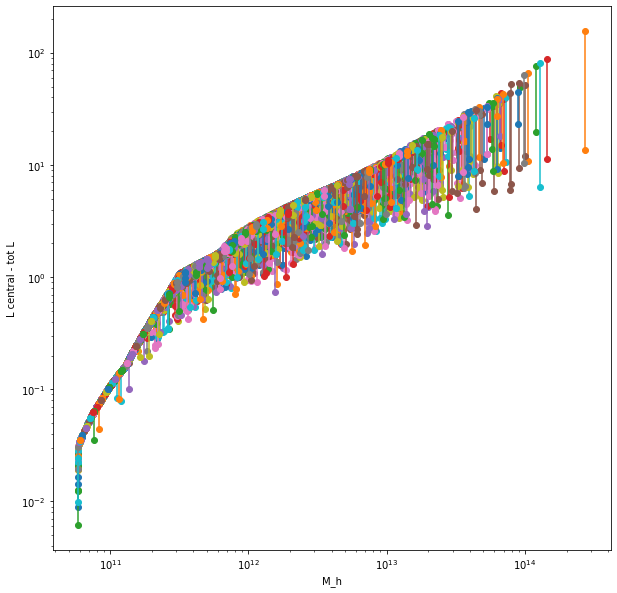

In [100]:
plt.figure(figsize=(10,10))
plt.loglog([M_h_cen[i_plot],M_group[i_plot]], [L_cen[i_plot],tot_L[i_plot]],'o-')
plt.xlabel('M_h')
plt.ylabel('L central - tot L')
plt.show()